In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics


In [40]:
df = pd.read_csv('data/phoneme.csv')
#droppig row.names column from dataset
df.drop('row.names', inplace=True, axis=1)



#dataset for Y axis (response variable) containng only class labels
df_y = df[['g','speaker']]


#dropping class labels "g" for training dataset (independent variable dataset)
df.drop('g', inplace=True, axis=1)

#data set for training (X axis) where "speaker" column has train
X_train = df[df['speaker'].str.contains('train') ]
#droping speaker column now 
X_train.drop('speaker', inplace=True, axis=1)


#data set for testing (X axis) where "speaker" column has test
X_test = df[df['speaker'].str.contains('test') ]
#data set dropping speaker column
X_test.drop('speaker', inplace=True, axis=1)

#Splitting data test train according to speaker column for Y axis

Y_train = df_y[df_y['speaker'].str.contains('train') ]
#dropping speaker column from Y train
Y_train.drop('speaker', inplace=True, axis=1)

#Y test dataset preparation
Y_test = df_y[df_y['speaker'].str.contains('test') ]
#dropping speaker column from Y train
Y_test.drop('speaker', inplace=True, axis=1)


Y_train.head()




,g
0,sh
1,iy
2,dcl
3,dcl
4,aa


### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [41]:
from sklearn.metrics import accuracy_score

# TODO
# lda = LDA(n_components=2)

lda = LDA()

model = lda.fit(X_train, Y_train.values.ravel())#train_X, train_Y.values.ravel())

y_predict_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_predict_train)
train_error_X_train  = 1 - accuracy_train

y_predict_test = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_predict_test)
test_error_X_test = 1 - accuracy_test

print("Error for entire g column")
print("training Error: ",(train_error_X_train*100), "% and Test Error: ", (test_error_X_test*100),"%")



Error for entire g column
training Error:  5.598802395209579 % and Test Error:  8.041060735671513 %


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

Text(0.5, 1.0, 'First two Cannonical Coordiantes')

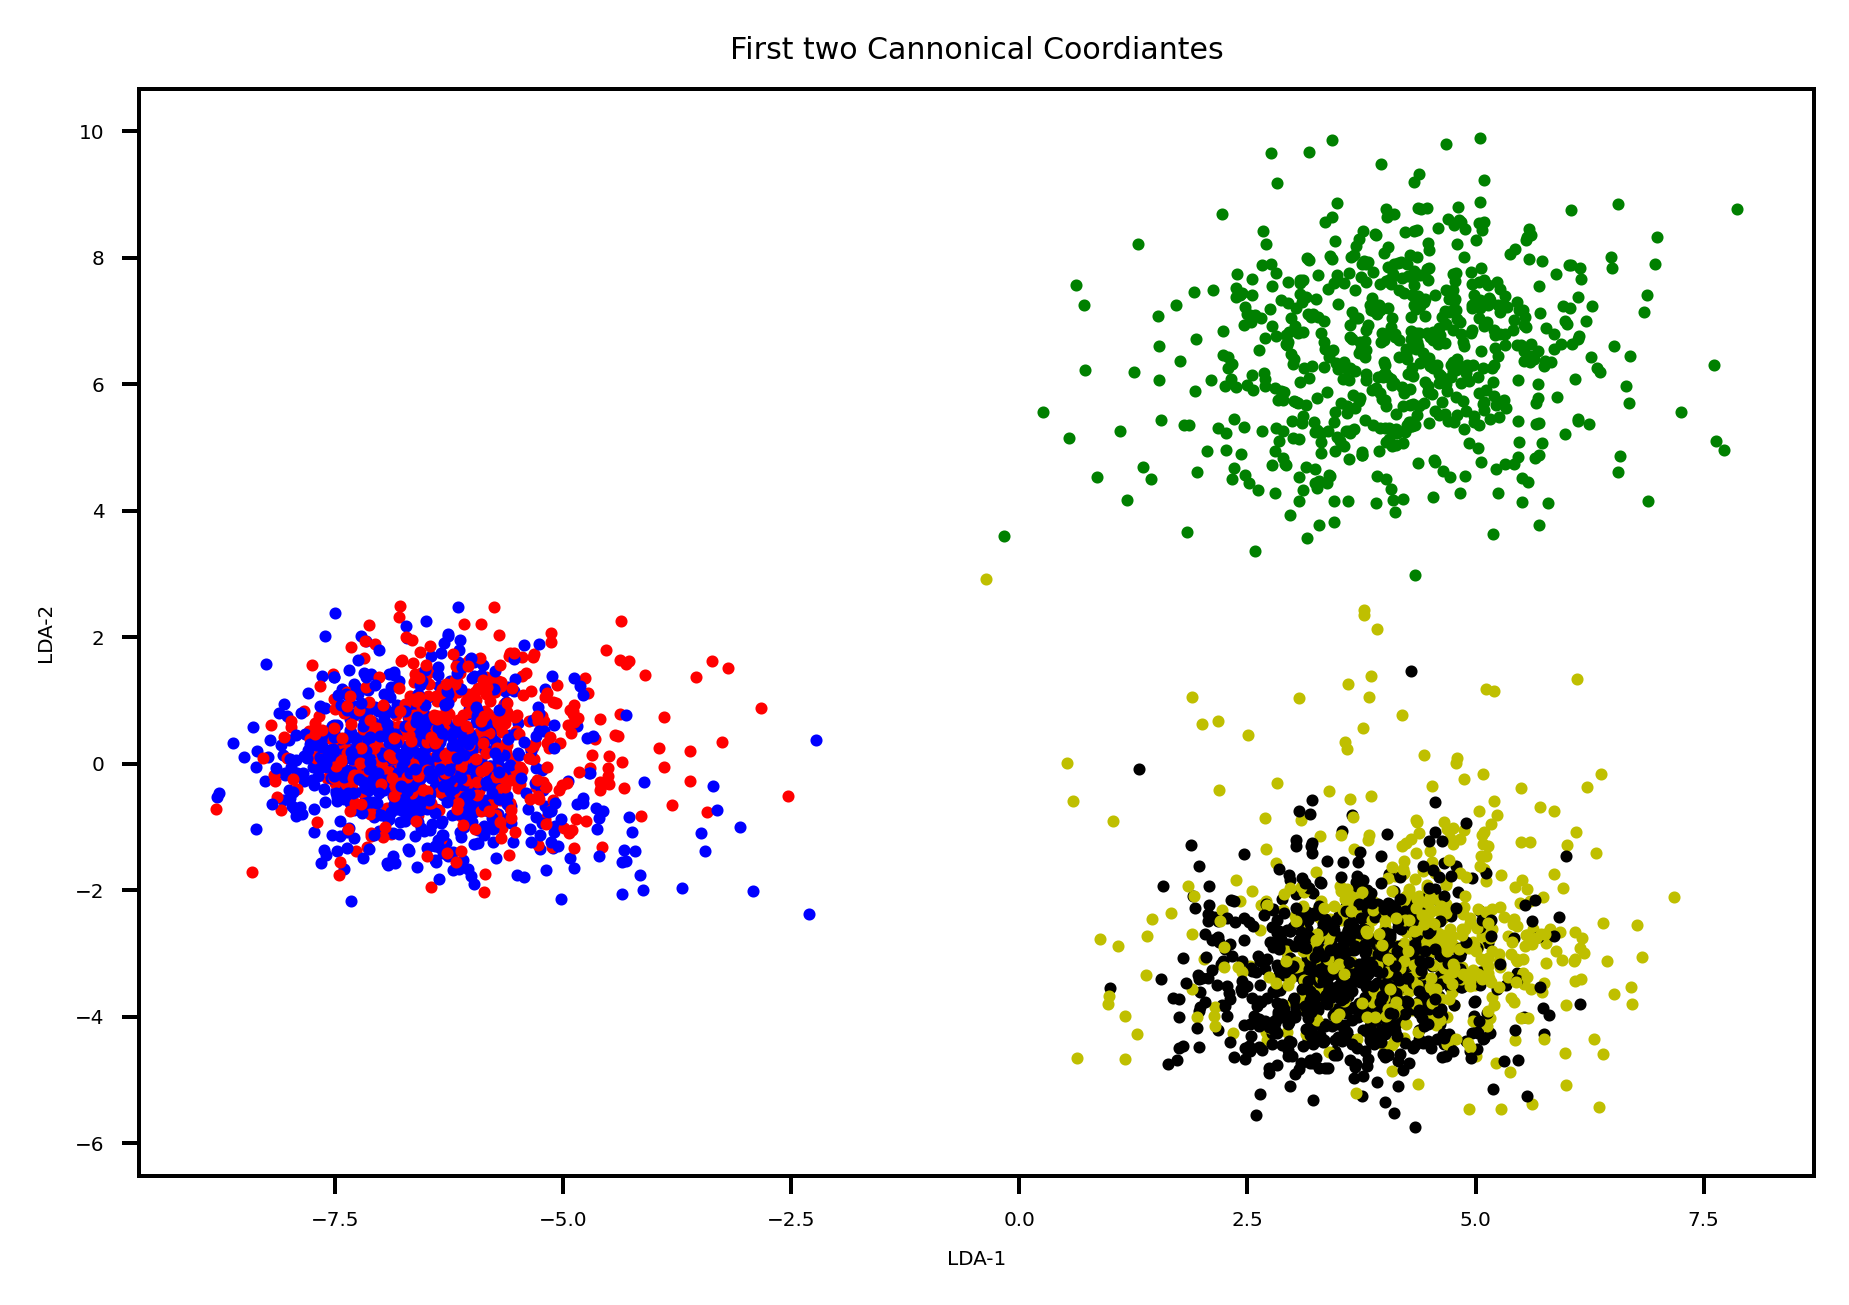

In [42]:
### collecting all labels and assigning distinct colours

labels_targets = list(set(list(Y_train.iloc[:,0])))

labels_targets

label_colours = ["r", "y", "b", "k","g"]

label_col_dict = {}

for i in range(len(labels_targets)):
    label_col_dict[labels_targets[i]] = label_colours[i]


all_labels = list(Y_train['g'])
# TODO 
lda = LDA(n_components=4)

plt.figure(dpi=360)

model = lda.fit(X_train, Y_train.values.ravel()).transform (X_train)#train_X, train_Y.values.ravel())




for i in range(len(all_labels)):
    plt.scatter(model[i,0], model[i,1], s=2, c=label_col_dict[all_labels[i]])

## first two cannonical coordinates
plt.xlabel("LDA-1")
plt.ylabel("LDA-2")
# plt.legend()
# plt.legend(("r", "y", "b", "k","g"),
#            scatterpoints=1,
#            loc='best',
#            shadow=False,
#            fontsize=8)
plt.title("First two Cannonical Coordiantes")


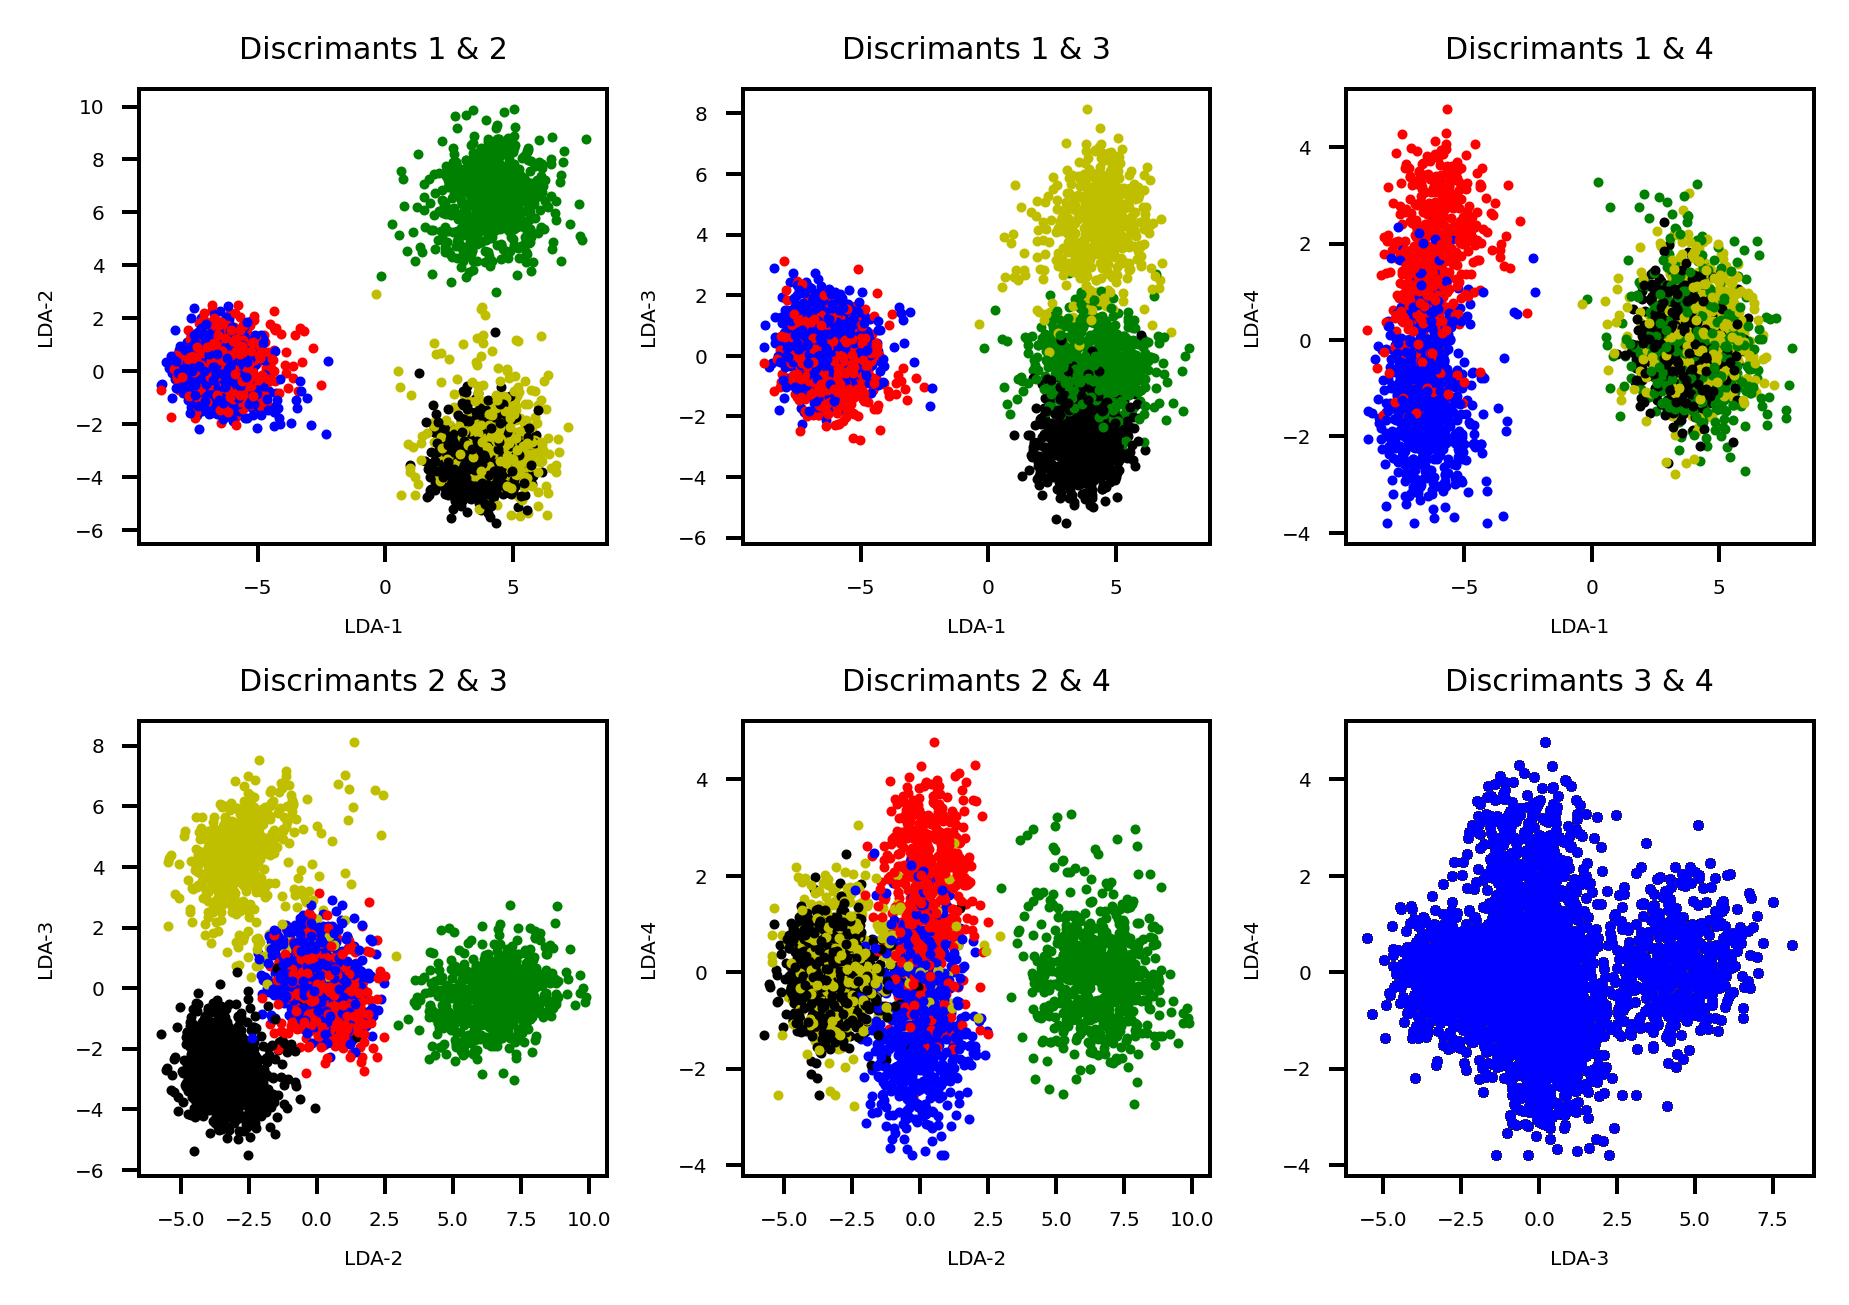

In [43]:
### Investigation of data projected on further dimensions

plt.figure(dpi=360)

plt.rc('font', size=4)
plt.rc('axes', titlesize=6)

plt.subplot(2,3,1)
plt.title("Discrimants 1 & 2")
plt.xlabel("LDA-1")
plt.ylabel("LDA-2")
# plt.scatter(model[:,0], model[:,1], s=1)


for i in range(len(all_labels)):
    plt.scatter(model[i,0], model[i,1], s=1, c=label_col_dict[all_labels[i]])


plt.subplot(2,3,2)
plt.title("Discrimants 1 & 3")
plt.xlabel("LDA-1")
plt.ylabel("LDA-3")
# plt.scatter(model[:,0], model[:,2], s=1)


for i in range(len(all_labels)):
    plt.scatter(model[i,0], model[i,2], s=1, c=label_col_dict[all_labels[i]])


plt.subplot(2,3,3)
plt.title("Discrimants 1 & 4")
plt.xlabel("LDA-1")
plt.ylabel("LDA-4")
# plt.scatter(model[:,0], model[:,3], s=1)


for i in range(len(all_labels)):
    plt.scatter(model[i,0], model[i,3], s=1, c=label_col_dict[all_labels[i]])


plt.subplot(2,3,4)
plt.title("Discrimants 2 & 3")
plt.xlabel("LDA-2")
plt.ylabel("LDA-3")
# plt.scatter(model[:,1], model[:,2], s=1)


for i in range(len(all_labels)):
    plt.scatter(model[i,1], model[i,2], s=1, c=label_col_dict[all_labels[i]])


plt.subplot(2,3,5)
plt.title("Discrimants 2 & 4")
plt.xlabel("LDA-2")
plt.ylabel("LDA-4")
# plt.scatter(model[:,1], model[:,3], s=1)


for i in range(len(all_labels)):
    plt.scatter(model[i,1], model[i,3], s=1, c=label_col_dict[all_labels[i]])


plt.subplot(2,3,6)
plt.title("Discrimants 3 & 4")
plt.xlabel("LDA-3")
plt.ylabel("LDA-4")
# plt.scatter(model[:,2], model[:,3], s=1)


for i in range(len(all_labels)):
    plt.scatter(model[:,2], model[:,3], s=1, c=label_col_dict[all_labels[i]])


plt.subplots_adjust(wspace = 0.29, hspace=0.39)
plt.show()


### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [44]:
pd.options.mode.chained_assignment = None
# TODO

## Reading the dataset
df = pd.read_csv('data/phoneme.csv')
df = df[(df['g'] == "aa") | (df['g'] == "ao")]

## dropping row.names and speaker columns
df.drop('row.names', inplace=True, axis=1)



df_train = df[df['speaker'].str.contains('train') ]
## extractiong prediction column and dropping it
df_y_train = df_train['g'] 
df_train.drop('g', inplace=True, axis=1)
df_train.drop('speaker', inplace=True, axis=1)


df_test = df[df['speaker'].str.contains('test') ]
df_y_test = df_test['g'] 
df_test.drop('g', inplace=True, axis=1)
df_test.drop('speaker', inplace=True, axis=1)


### Fitting the LDA Model


lda = LDA()

model = lda.fit(df_train, df_y_train)

y_predict_train = model.predict(df_train)

accuracy_train = accuracy_score(df_y_train, y_predict_train)

train_error_X_train  = 1 - accuracy_train

y_predict_test = model.predict(df_test)
accuracy_test = accuracy_score(df_y_test, y_predict_test)
test_error_X_test = 1 - accuracy_test

print("Error for aa and ao")
print("training Error: ",(train_error_X_train*100), "% and Test Error: ", (test_error_X_test*100),"%")
                 
                 

Error for aa and ao
training Error:  10.641627543035991 % and Test Error:  21.4123006833713 %


## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [45]:
# TODO

#### QDA for entire dataset

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

model = qda.fit(X_train, Y_train.values.ravel())

y_predict_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_predict_train)
train_error_X_train  = 1 - accuracy_train


y_predict_test_q = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_predict_test_q)
test_error_X_test = 1 - accuracy_test


print("QDA for Entire Data set")
print("training Error: ",(train_error_X_train*100), "% and Test Error: ", (test_error_X_test*100),"%")


##### QDA for aa ao labels

qda = QDA()

model = qda.fit(df_train, df_y_train)

y_predict_train = model.predict(df_train)

accuracy_train = accuracy_score(df_y_train, y_predict_train)

train_error_X_train  = 1 - accuracy_train

y_predict_test_q = model.predict(df_test)
accuracy_test = accuracy_score(df_y_test, y_predict_test_q)
test_error_X_test = 1 - accuracy_test

print("QDA for aa and ao labels")
print("training Error: ",(train_error_X_train*100), "% and Test Error: ", (test_error_X_test*100),"%")
                 




QDA for Entire Data set
training Error:  0.0 % and Test Error:  15.82549187339607 %
QDA for aa and ao labels
training Error:  0.0 % and Test Error:  33.94077448747153 %


## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

In [46]:
# TODO 
from sklearn.metrics import confusion_matrix

cm_lda = confusion_matrix( df_y_test,y_predict_test)
cm_qda = confusion_matrix( df_y_test,y_predict_test_q)
print(df_y_test.shape)
print("CONFUSION MATRIX FOR LDA")
print(cm_lda)

print("\n\n\nCONFUSION MATRIX FOR QDA")
print(cm_qda)

(439,)
CONFUSION MATRIX FOR LDA
[[121  55]
 [ 39 224]]



CONFUSION MATRIX FOR QDA
[[ 29 147]
 [  2 261]]
